In [976]:
# Import Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


loading data from ../calibration_results.p
00, P2 103900 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -2900/ -1100)*VL + (-103900 /  6.427)*Cd = 1
01, P2 104800 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -3800/ -1500)*VL + (-104800 /  6.331)*Cd = 1
02, P2 106500 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -5500/ -2400)*VL + (-106500 /  6.229)*Cd = 1
03, P2 108600 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -7600/ -3700)*VL + (-108600 /  6.123)*Cd = 1
04, P2 110300 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -9300/ -4500)*VL + (-110300 /  6.023)*Cd = 1
05, P2 110600 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -9600/ -7700)*VL + (-110600 /  5.918)*Cd = 1
06, P2 112800 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             (-11700/ -7400)*VL + (-112900 /  5.866)*Cd = 1
07, P2 11380

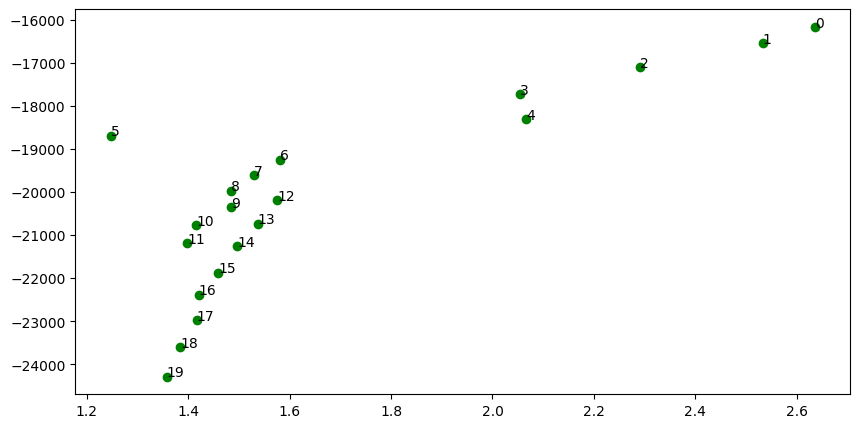

In [985]:
P_0 = 1.01*1e5  # Pa
        
def load_data(side="left", pressure="positive", filepath="../calibration_results.p"):

    def _load_pickle(filepath=filepath):
        print(f"loading data from {filepath}")
        import pickle
        [
            P_Ll,
            P_Cl,
            P_2l,
            V_1l,
            V_2l,
            P_Lr,
            P_Cr,
            P_2r,
            V_1r,
            V_2r,
                ]=pickle.load(open( filepath, "rb" ) )
        
        P_Ll = np.array(P_Ll)
        P_Cl = np.array(P_Cl)
        P_2l = np.array(P_2l)
        V_1l = np.array(V_1l)
        V_2l = np.array(V_2l)

        P_Lr = np.array(P_Lr)
        P_Cr = np.array(P_Cr)
        P_2r = np.array(P_2r)
        V_1r = np.array(V_1r)
        V_2r = np.array(V_2r)

        return P_Ll,P_Cl,P_2l,V_1l,V_2l,P_Lr,P_Cr,P_2r,V_1r,V_2r
        
    def _calculate(P_L1, P_C1, P_2, V_1, V_2, idx):
        # ax+by=c form
        assert(abs(V_1 - V_2) < 1e-7)
        # x = (P_L1 - P_2)*P_0
        # y2 = P_L1*(P_L1-P_0) + P_2*(P_0-P_2)
        # y = (P_L1-P_2)*(P_L1+P_2-P_0)
        # assert(y==y2)
        # c = (P_2-P_C1)*P_0 * V_1
        # print(f"(P_L1-P_2): {int((P_L1-P_2))}, (P_L1+P_2-P_0): {int((P_L1+P_2-P_0))}, (P_2-P_C1): {int(P_2-P_C1)}, V_1-V_2: {V_1-V_2}")

        print(f"{idx:02d}, P2 {int(P_2)} | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1, \
            ({(P_L1-P_2): 6.0F}/{(P_2-P_C1): 6.0F})*VL + ({-(P_L1+P_2-P_0): 7.0F} /{ P_0*V_1: 7.3F})*Cd = 1") 

        x = (P_L1-P_2)/(P_2-P_C1)
        y = -(P_L1+P_2-P_0)/(P_0*V_1)
        c = 1

        # print("V_1: {}".format(V_1))
        return x, y, c

    P_Ll,P_Cl,P_2l,V_1l,V_2l,P_Lr,P_Cr,P_2r,V_1r,V_2r = _load_pickle()
    X=[]
    Y=[]
    C=[]
    if pressure == "positive":
        RANGE = range(0,20)
    elif pressure == "negative":
        RANGE = range(20, len(P_Ll))
    elif pressure == "both":
        RANGE = range(0, len(P_Ll))

    if side == "left":
        for i in RANGE:
            x,y,c = _calculate(P_Ll[i], P_Cl[i], P_2l[i], V_1l[i], V_2l[i], i)
            X.append(x)
            Y.append(y)
            C.append(c)
    elif side == "right":
        for i in RANGE:
            x,y,c = _calculate(P_Lr[i], P_Cr[i], P_2r[i], V_1r[i], V_2r[i], i)
            X.append(x)
            Y.append(y)
            C.append(c)

    X=np.array(X)
    Y=np.array(Y)
    C=np.array(C)

    print("X: {}, Y: {}, C: {}".format(X , Y, C))
    return X, Y, C
    
side = "left"
X, Y, C = load_data(side=side, pressure="positive")

if side == "both":
    cutoff = int(len(X)/2)
    plt.scatter(X[:cutoff], Y[:cutoff], c='green', label='Scatter data')
    plt.scatter(X[cutoff:], Y[cutoff:], c='cyan', label='Scatter data')
else :
    plt.scatter(X, Y, c='green', label='Scatter data')

for i in range(len(X)):
    plt.text(X[i], Y[i], str(i))
plt.show()

In [978]:
np.corrcoef(X, Y)

array([[1.        , 0.87007092],
       [0.87007092, 1.        ]])

In [979]:
# Calculating coefficient
def calc_coeff(X,Y):
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # Total number of values
    n = len(X)

    # Using the formula to calculate theta1 and theta2
    numer = 0
    denom = 0
    for i in range(n):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

    # Printing coefficients
    print("y=mx+c, m and c: ", m, c)
    return m,c, mean_x, mean_y

m,c, mean_x, mean_y = calc_coeff(X,Y)

y=mx+c, m and c:  3539.2902021782456 -25504.84222062903


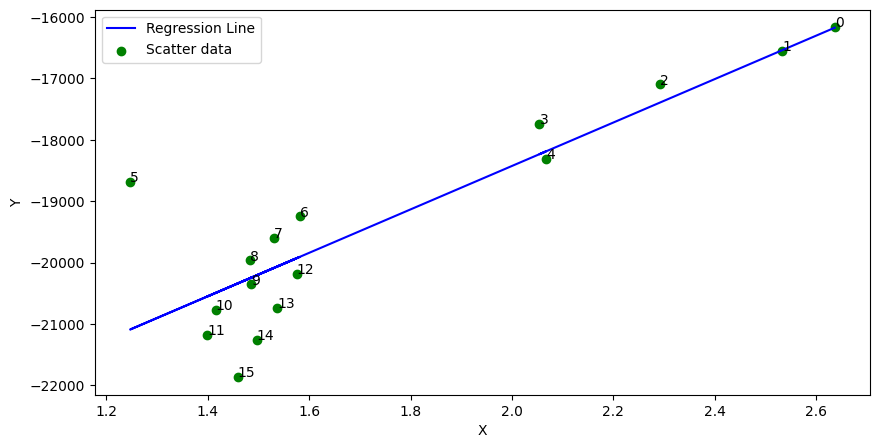

In [980]:
# Plotting Values and Regression Line
%matplotlib inline
def plot_line(X,Y,m,c):

    plt.rcParams['figure.figsize'] = (10.0, 5.0)
    # max_x = np.max(X) + 100
    # min_x = np.min(X) - 100

    y = m * X + c 

    # Ploting Line
    plt.plot(X, y, color='blue', label='Regression Line')
    # Ploting Scatter Points
    plt.scatter(X, Y, c='green', label='Scatter data')
    for i in range(len(X)):
        plt.text(X[i], Y[i], str(i))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
plot_line(X,Y,m,c)

In [981]:
# Calculating Root Mean Squares Error
def calc_rmse(X,Y,m,c):
    rmse = 0
    n = len(X)
    for i in range(n):
        y_pred = c + m * X[i]
        rmse += (Y[i] - y_pred) ** 2
        
    rmse = np.sqrt(rmse/n)
    print("Root Mean Square Error is",rmse)

calc_rmse(X,Y,m,c)

Root Mean Square Error is 840.8658104800779


In [982]:
# Calculating R2 Score
def calc_r2_score(X, Y, mean_y, m, c):
    ss_tot = 0
    ss_res = 0
    for i in range(len(X)):
        y_pred = c + m * X[i]
        ss_tot += (Y[i] - mean_y) ** 2
        ss_res += (Y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    print("R2 Score",r2)
    
calc_r2_score(X, Y, mean_y, m, c)


R2 Score 0.7570233981582875


In [983]:
def calc_VL_CLd(m,c):
    P_0 = 1.01*1e5  # Pa
    P_L = np.arange(0.5*P_0, 1.6*P_0, 1e5) 
    CLd = -1/c
    VL = CLd*m
    print(f"CLd = {CLd:.7f}, VL = {VL:.7f}")
    print(f"CLd of {CLd:.7f} -> volume increase {(CLd*1000/P_0):.07f} m3 or {(CLd*1000/P_0/VL):.07f} times VL for each kPa increase in pressure")
    # C_ = X*VL + Y*CLd 

    # Plotting VL1
    VL1 = VL + (P_L-P_0)/P_0*CLd
    print(VL1[0], VL1[-1], P_L[0]/1000, P_L[-1]/1000)
    return VL, CLd, VL1, P_L


VL, CLd, VL1, P_L = calc_VL_CLd(m,c)


CLd = 0.0000392, VL = 0.1387693
CLd of 0.0000392 -> volume increase 0.0000004 m3 or 0.0000028 times VL for each kPa increase in pressure
0.13874973903253449 0.13878855907311097 50.5 150.5


loading data from ../calibration_results_left_small_right_large.p
00, P2 104400 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -3400/  -400)*VL + (-104400 /  6.428)*Cd = 1
01, P2 105500 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -4500/  -500)*VL + (-105500 /  6.330)*Cd = 1
02, P2 107800 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -6800/  -700)*VL + (-107800 /  6.229)*Cd = 1
03, P2 110700 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -9700/  -900)*VL + (-110700 /  6.124)*Cd = 1
04, P2 113000 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             (-12000/ -1100)*VL + (-113000 /  6.026)*Cd = 1
05, P2 116000 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             (-15000/ -1500)*VL + (-116000 /  5.919)*Cd = 1
06, P2 119600 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             (-18600/ -1600)*VL + (-119600 /  5.8

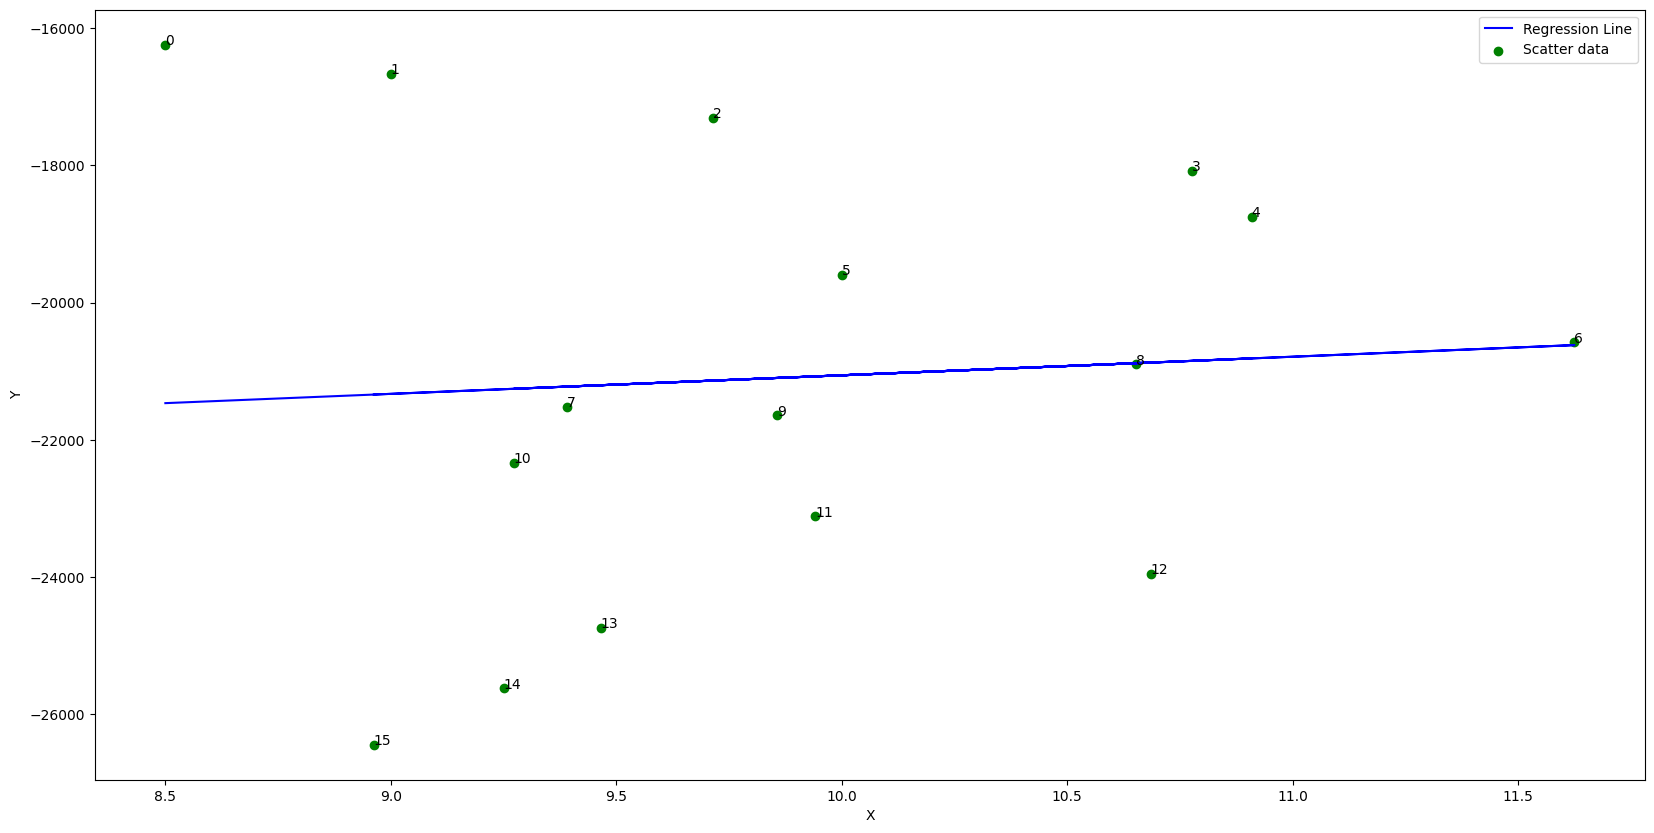

CLd = 0.0000421, VL = 0.0113905
CLd of 0.0000421 -> volume increase 0.0000004 m3 or 0.0000366 times VL for each kPa increase in pressure
0.01136941833428817 0.011411076629892946 50.5 150.5
loading data from ../calibration_results_left_small_right_large.p
00, P2 103800 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -2800/ -2200)*VL + (-103800 /  6.430)*Cd = 1
01, P2 105100 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -3900/ -3000)*VL + (-105300 /  6.329)*Cd = 1
02, P2 106900 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -5900/ -4800)*VL + (-106900 /  6.225)*Cd = 1
03, P2 108700 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -7700/ -6900)*VL + (-108700 /  6.127)*Cd = 1
04, P2 110600 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -9600/ -9000)*VL + (-110600 /  6.023)*Cd = 1
05, P2 112600 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd

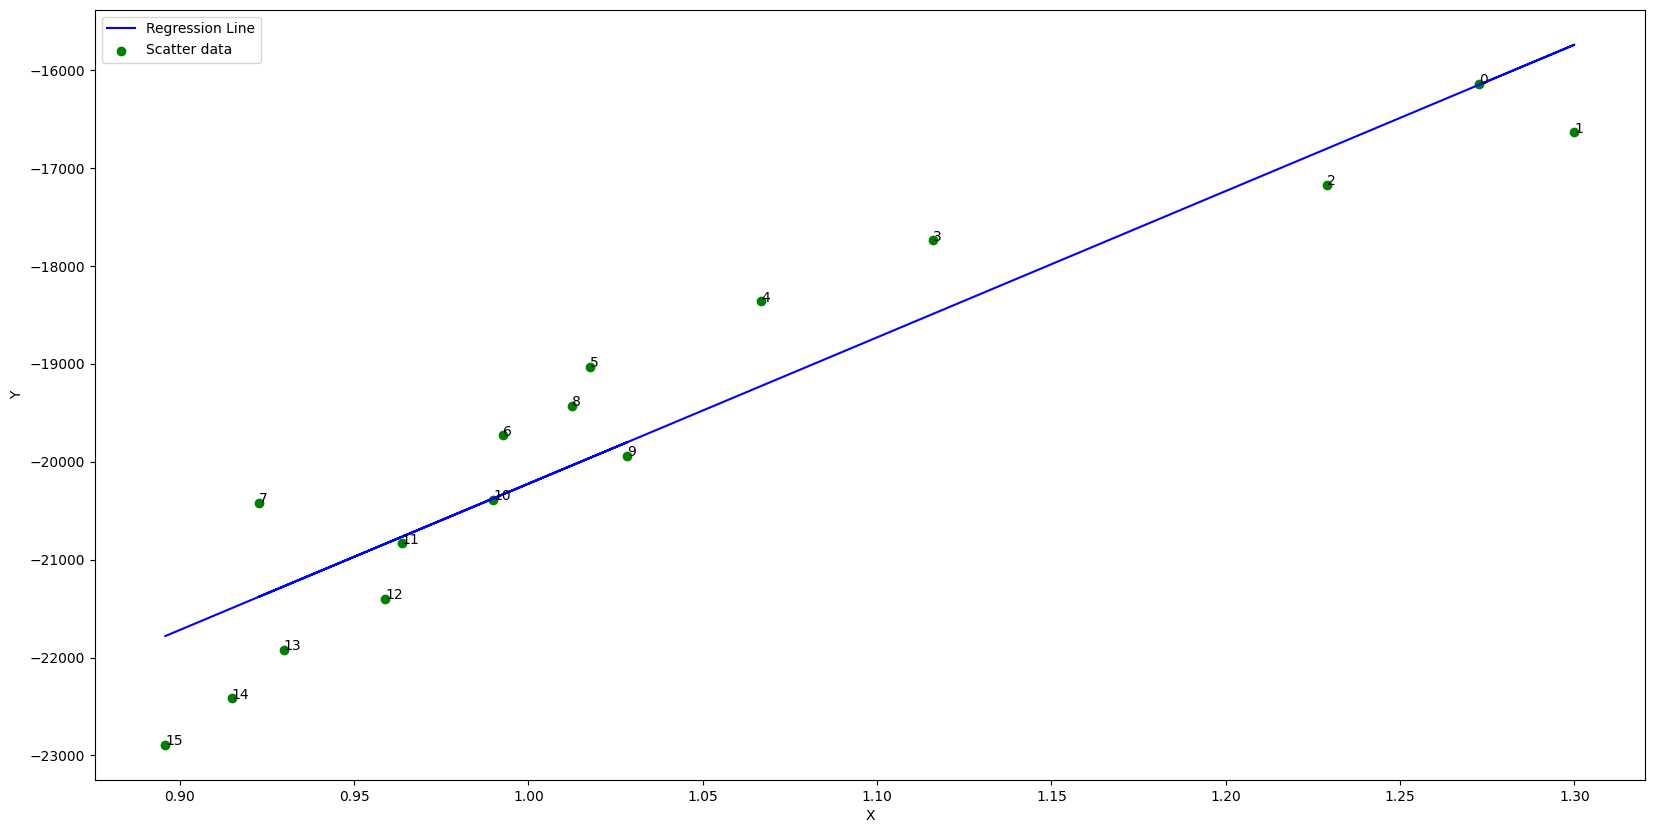

CLd = 0.0000284, VL = 0.4248577
CLd of 0.0000284 -> volume increase 0.0000003 m3 or 0.0000007 times VL for each kPa increase in pressure
0.42484352446726753 0.42487167996336767 50.5 150.5
loading data from ../calibration_results_left_small_right_large.p
00, P2 104400 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -3400/  -400)*VL + (-104400 /  6.428)*Cd = 1
01, P2 105500 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -4500/  -500)*VL + (-105500 /  6.330)*Cd = 1
02, P2 107800 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -6800/  -700)*VL + (-107800 /  6.229)*Cd = 1
03, P2 110700 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             ( -9700/  -900)*VL + (-110700 /  6.124)*Cd = 1
04, P2 113000 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd = 1,             (-12000/ -1100)*VL + (-113000 /  6.026)*Cd = 1
05, P2 116000 | (P_L1-P_2)/(P_2-P_C1)*VL - (P_L1+P_2-P_0)/(P_0*V_1)*Cd 

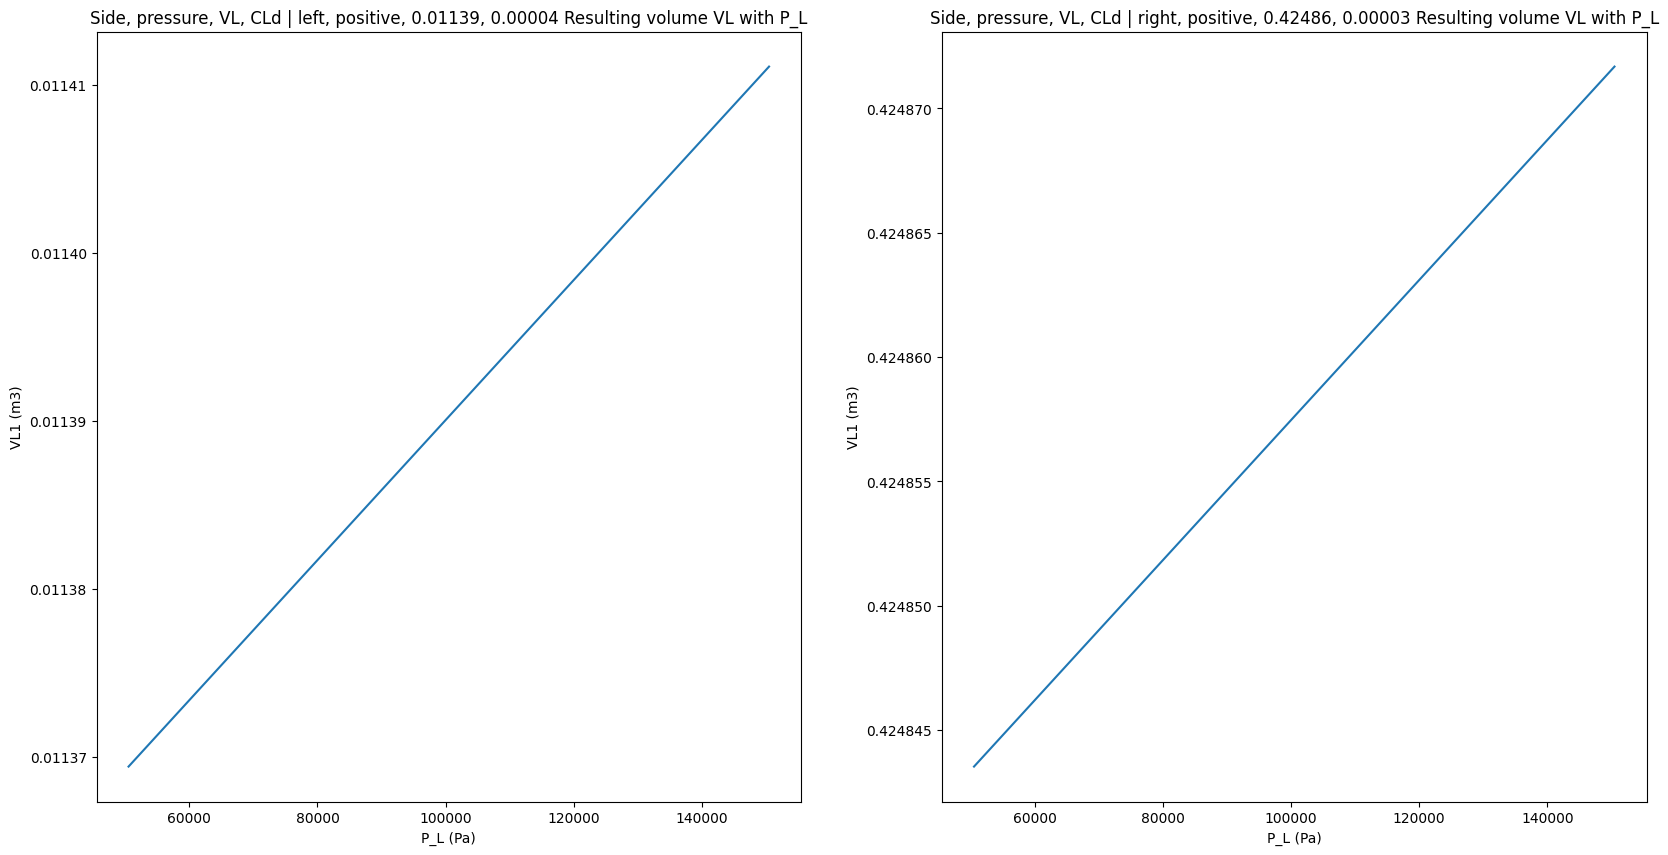

In [984]:
def get_VL_CLd(side="left",pressure="positive", plot=False):
    X,Y, _ = load_data(side=side, pressure=pressure, filepath="../calibration_results_left_small_right_large.p")
    # X,Y, _ = load_data(side=side, pressure=pressure, filepath="../calibration_results.p")
    m,c, _,_ = calc_coeff(X,Y)
    if plot==True:
        plot_line(X,Y,m,c)
    VL, CLd, VL1, P_L = calc_VL_CLd(m,c)
    return VL, CLd, VL1, P_L 


permutations = [
    "left_positive", 
    "right_positive", 
    # "left_negative", 
    # "right_negative"
    ]

for (i, item) in enumerate(permutations):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    side, pressure = (item.split("_"))
    VL, CLd, VL1, P_L = get_VL_CLd(side=side,pressure=pressure, plot=True)
# plt.legend(["left, positive", "left, negative", "right, positive", "right, negative"])
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax = ax.flatten()
for (i, item) in enumerate(permutations):
    side, pressure = (item.split("_"))
    VL, CLd, VL1, P_L = get_VL_CLd(side=side,pressure=pressure)
    ax[i].set_title(f"Side, pressure, VL, CLd | {side}, {pressure}, {VL:7.05f}, {CLd:7.05f} Resulting volume VL with P_L")
    ax[i].plot(P_L, VL1, label='VL1')
    ax[i].set_xlabel('P_L (Pa)')
    ax[i].set_ylabel('VL1 (m3)')
    ax[i].ticklabel_format(useOffset=False)
# plt.legend(["left, positive", "left, negative", "right, positive", "right, negative"])
plt.show()